In today's data-driven business landscape, the Customer Clustering Project takes center stage as a pivotal initiative aimed at unraveling the intricacies of our customer base. Through a rigorous process of comprehensive data analysis and the utilization of cutting-edge machine learning methodologies, we aspire to categorize our customers into distinct clusters, each characterized by shared attributes and behaviors. This strategic segmentation will empower us to tailor our products and services to better meet the unique needs of each cluster, ultimately fostering deeper customer engagement, enabling personalized marketing strategies, and facilitating more informed decision-making. The profound significance of this project lies in its potential to unlock hidden insights within our customer data, thereby enhancing customer satisfaction and propelling our business towards exponential growth.

For reference, the dataset utilized in this project was sourced from [Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data).

# Imports

In [153]:
import pandas as pd
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
import numpy as np

In [154]:
df = pd.read_csv('Mall_Customers.csv')

# EDA - Exploratory Data Analysis

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [156]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [157]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Distributions

### Missing

<Axes: >

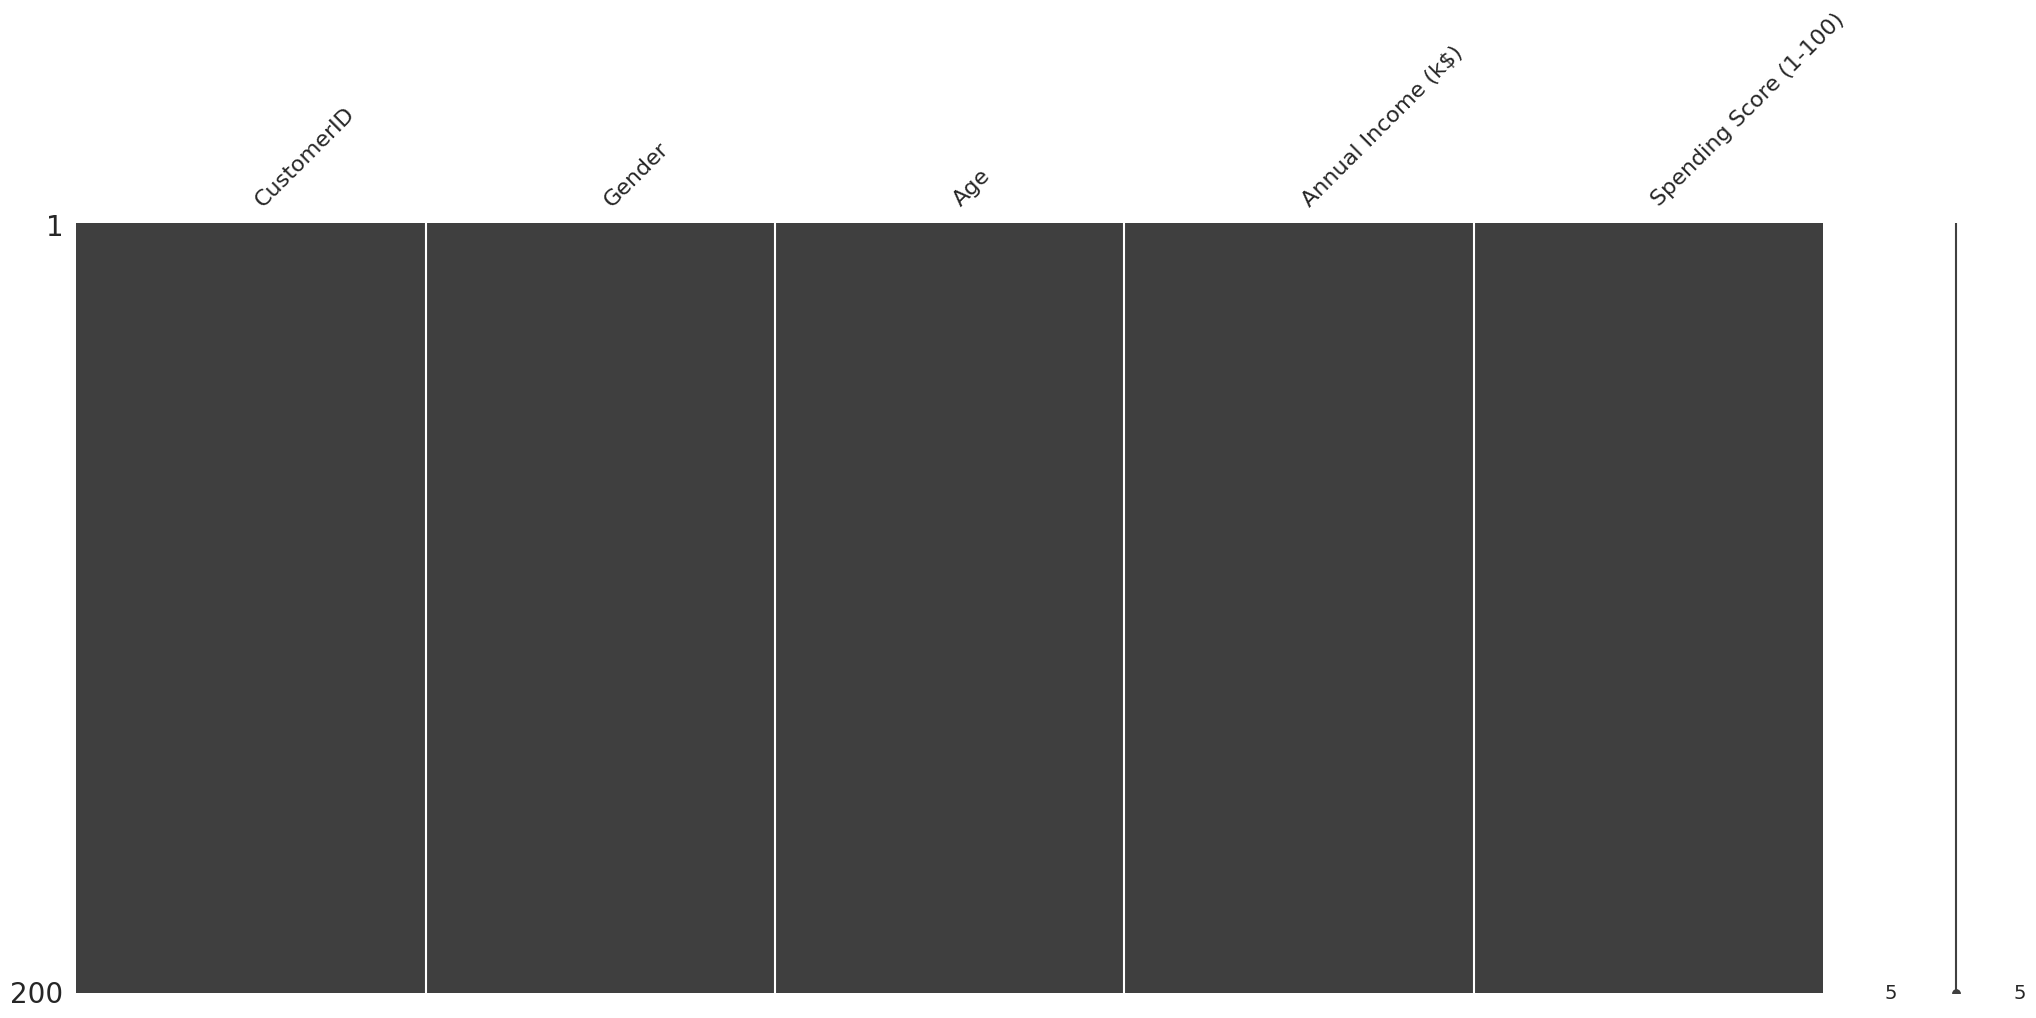

In [158]:
msn.matrix(df)

As we can see, there isn't any null values in this dataset

### Age

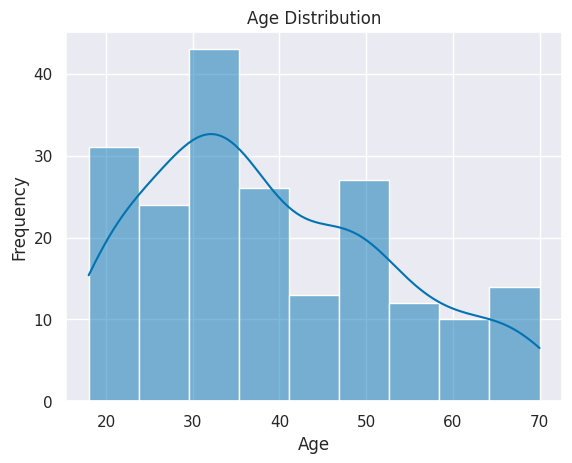

<Figure size 1000x600 with 0 Axes>

In [159]:
# Create a histogram of the age distribution
sns.set_palette("colorblind")

sns.histplot(df['Age'], kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the plot
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.show()

The distribution of customer ages, with a mean age of approximately 38.85, ranging from 18 to 70 years, and a moderate standard deviation of about 13.97, indicating a relatively spread-out age distribution.

### Income

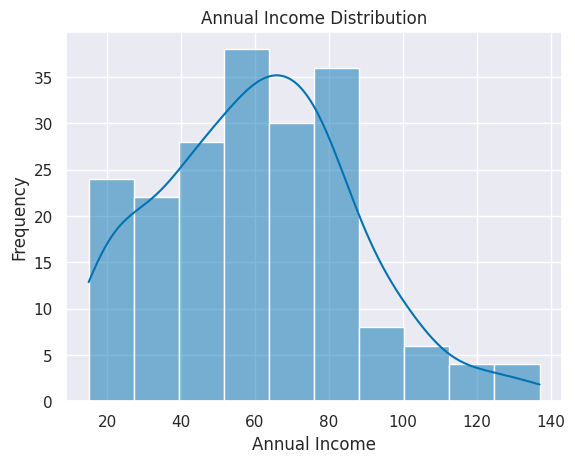

<Figure size 1000x600 with 0 Axes>

In [160]:
# Create a histogram of the age distribution
sns.set_palette("colorblind")

sns.histplot(df['Annual Income (k$)'], kde=True)

# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution')

# Show the plot
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.show()

The distribution of customer annual incomes, with a mean income of around 60.56 thousand dollars, varying from a minimum of 15 thousand dollars to a maximum of 137 thousand dollars, and exhibiting a standard deviation of approximately 26.26, signifying considerable income variability among customers.

### Spending Score

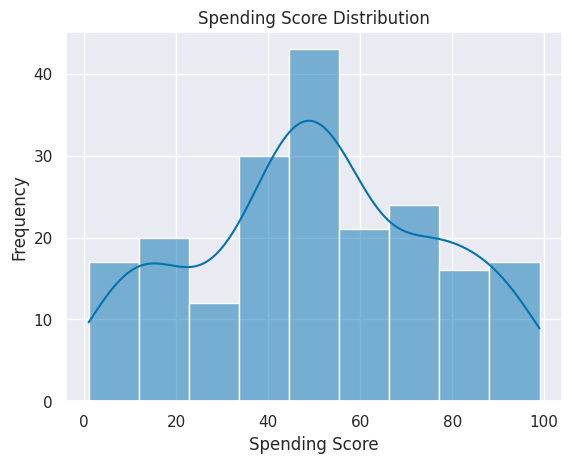

<Figure size 1000x600 with 0 Axes>

In [161]:
# Create a histogram of the age distribution
sns.set_palette("colorblind")

sns.histplot(df['Spending Score (1-100)'], kde=True)

# Add labels and title
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Spending Score Distribution')

# Show the plot
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.show()

The distribution of customer spending scores, with a mean score of about 50.20, ranging from 1 to 99, and demonstrating a moderate standard deviation of around 25.82, reflecting variability in spending behavior among the customer base.

### Gender and the continuous variables

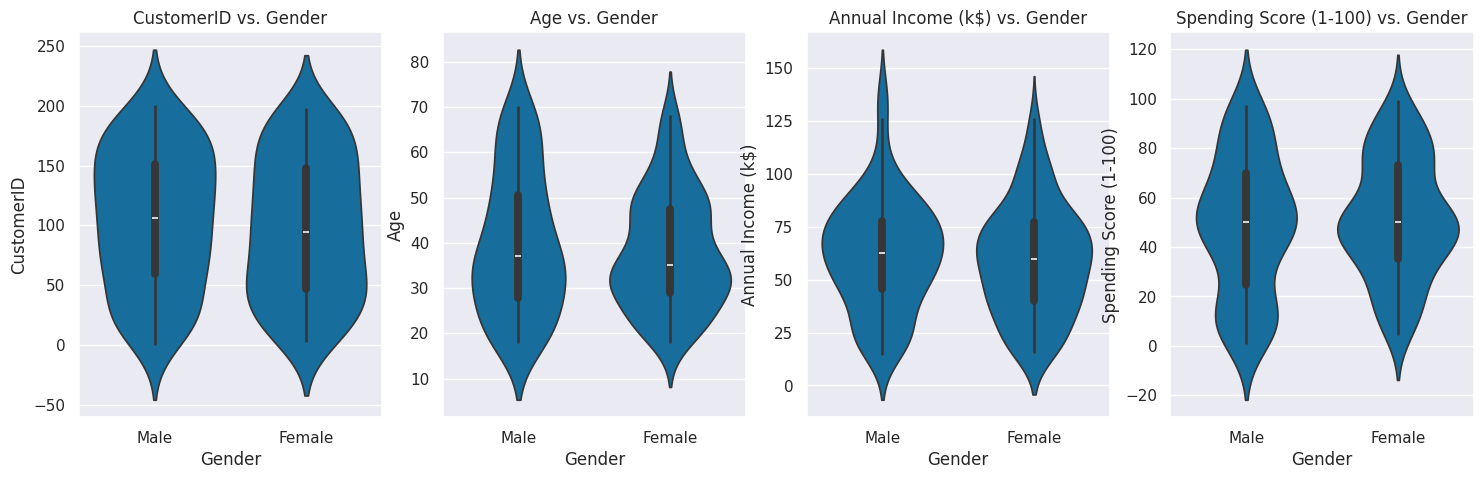

In [162]:
# Create subplots for boxplots
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(1, len(continuous_vars), figsize=(18, 5))

# Iterate through the continuous variables and create violin plots
for i, var in enumerate(continuous_vars):
    sns.violinplot(x="Gender", y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs. Gender')

    # Calculate the t-test and print the p-value
    male_data = df[df['Gender'] == 'Male'][var]
    female_data = df[df['Gender'] == 'Female'][var]

plt.show()

The summary statistics show a comparison between "Female" and "Male" gender groups. In terms of age, "Male" tends to have a higher mean age compared to "Female." Similarly, the annual income mean for "Male" is slightly higher than that of "Female." When it comes to spending score, "Male" also shows a higher mean. The standard deviations indicate the degree of variability within each group for these variables. The quartiles, which represent the distribution of the data, differ between the two groups. Overall, the statistics suggest differences in the central tendencies and distributions of age, annual income, and spending score between the "Female" and "Male" groups.

## Correlations

/tmp/ipykernel_62357/2830952776.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Heatmap')

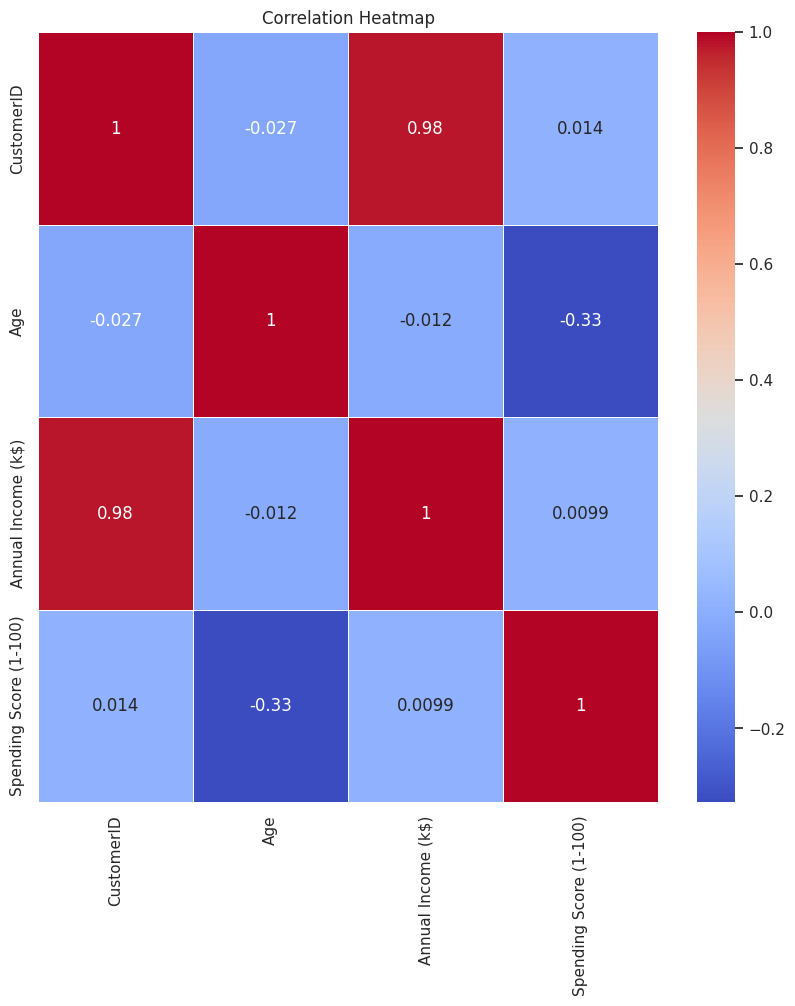

In [163]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")  

The correlation analysis reveals relationships among the variables in the dataset. The strongest correlation is observed between CustomerID and Annual Income (k$), indicating a robust positive correlation, though the practical significance of this relationship is questionable given that CustomerID is primarily an identifier. Meanwhile, Age and Spending Score (1-100) display a moderate negative correlation, suggesting that as customers' age increases, their spending score tends to decrease to some extent. Annual Income and Spending Score exhibit a very weak positive correlation, implying that there's minimal linear association between customers' annual income and their spending behavior. These findings provide initial insights into the interplay of these variables, but further analysis and context may be needed to understand their implications fully.

# Clustering

In our customer segmentation project, we plan to employ a combination of clustering algorithms—DBSCAN, K-Means, and Gaussian Mixture Model (GMM)—to gain comprehensive insights into our diverse customer base. DBSCAN will be valuable for identifying clusters of varying shapes and effectively handling noisy data, providing robust segmentation in scenarios where clusters may not be well-defined. K-Means, on the other hand, will help partition our data into non-overlapping clusters, allowing us to create clear and distinct customer segments. Finally, GMM will be instrumental in modeling our customer data probabilistically, accommodating clusters with different shapes and providing probabilistic cluster assignments. By leveraging these three clustering methods, we aim to achieve a more nuanced understanding of our customers, addressing the full spectrum of segmentation challenges and uncovering valuable patterns within our dataset.

In our data analysis project, we're converting gender labels into binary values to facilitate more efficient and meaningful analysis. This transformation simplifies gender representation, making it easier to uncover gender-related patterns and insights in our data. Our goal is to gain valuable knowledge that can inform better decision-making in diverse fields, from marketing to social sciences. For the cluster we will not use the ID.

In [164]:
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)
df_model = df.copy().drop(columns='CustomerID')

## K-Means

**Model Parameters:**

K-Means clustering is a straightforward yet powerful algorithm that requires several key parameters to operate effectively:

1. **Number of Clusters (K):** The most crucial parameter in K-Means, K represents the number of clusters you want to identify in your dataset. Determining an optimal value for K can be done through various techniques, such as the Elbow Method, Silhouette Score, or domain knowledge.

2. **Initialization Method:** K-Means begins with the initialization of cluster centroids. The choice of initialization method can influence the convergence and quality of results. Common initialization methods include "random" and "k-means++."

3. **Convergence Criteria:** K-Means continues to update cluster assignments and centroids until convergence is achieved. You can define criteria for convergence, such as a maximum number of iterations or a threshold for centroid movement.

**How It Works:**

K-Means clustering operates through a series of iterative steps:

1. **Initialization:** Start by selecting K initial cluster centroids. The choice of initialization method impacts the algorithm's performance.

2. **Assignment:** For each data point, calculate its distance to each centroid and assign it to the cluster with the nearest centroid. This step creates K clusters.

3. **Update:** Recalculate the centroids of the clusters based on the data points assigned to them. The new centroids are the means of all data points in their respective clusters.

4. **Repeat:** Repeat the assignment and update steps until a convergence criterion is met. Common convergence criteria include reaching a maximum number of iterations or when the centroids no longer change significantly.

5. **Result:** Once the algorithm converges, you obtain K clusters, each characterized by its centroid, and a set of data points assigned to each cluster.

The algorithm strives to minimize the sum of squared distances (inertia) between data points and their respective cluster centroids, as defined by the following formula:


$$
\text{Inertia} = \sum_{i=1}^{K} \sum_{j=1}^{n_k} \left\| x_j - c_i \right\|^2
$$



Where:

K is the number of clusters.<br>
n<sub>k</sub> is the number of data points in cluster k.<br>
x<sub>j</sub> represents a data point in cluster k.<br>
c<sub>i</sub> denotes the centroid of cluster k.<br>


K-Means strives to partition the data into clusters such that the inertia is minimized, resulting in tight and well-separated clusters.

By adjusting the number of clusters (K) and the initializations, K-Means can reveal underlying structures and patterns within data, making it a versatile tool for tasks such as customer segmentation, image compression, and anomaly detection.

In [165]:
from sklearn.cluster import KMeans

Finding the best fit for the number of clusters (K) in K-Means clustering often involves a process of trial and evaluation. There are several methods and techniques to determine the optimal number of clusters. The chosen method was the Elbow Method.

The Elbow Method in K-Means clustering involves calculating the Within-Cluster Sum of Squares (WCSS) for a range of K values and identifying the "elbow" point where the rate of decrease in WCSS starts to slow down. The WCSS is computed as the sum of squared distances from each data point to its assigned cluster's centroid.

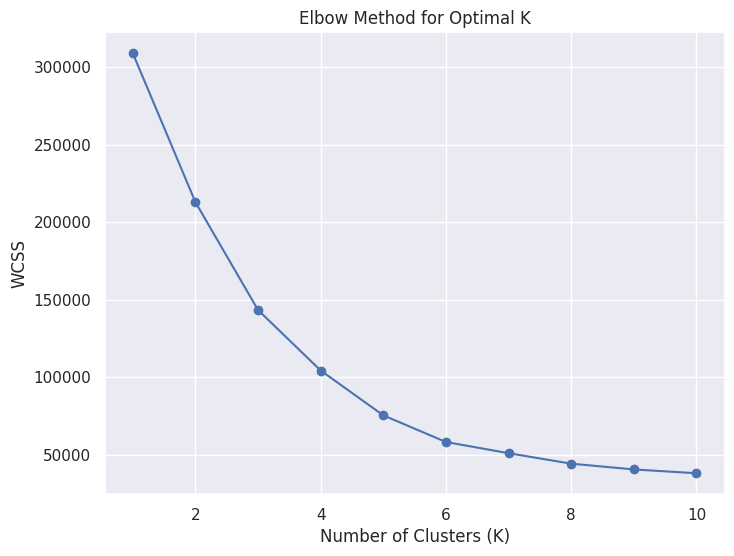

In [176]:
wcss = []

# Define the range of K values to test
k_values = range(1, 11)

# Run K-Means for each K and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=8, n_init=10)
    kmeans.fit(df_model)  # Replace 'data' with your dataset
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

The graph above illustrates the reduction in distortion score as the number of clusters increases. While there isn't a distinct "elbow" point evident, the underlying algorithm suggests either 5 or 6 clusters as reasonable choices. Another effective method for determining the optimal number of clusters is to assess the Silhouette Score in relation to the number of clusters. The Silhouette Score quantifies the similarity of data points within clusters to those in neighboring clusters, with values ranging from -1 to 1. Higher Silhouette Scores indicate more well-defined clusters. The K value associated with the highest Silhouette Score is typically considered the optimal choice for clustering. This approach provides a more data-driven and objective means of cluster selection.

In [167]:
from sklearn.metrics import silhouette_score

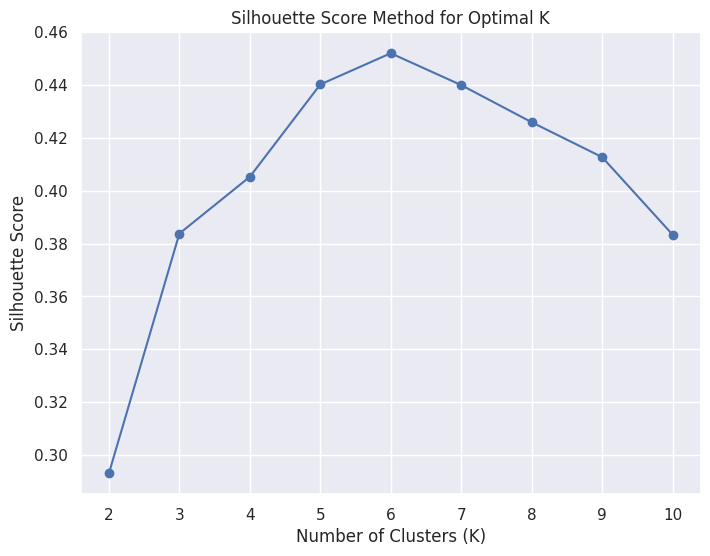

In [177]:
silhouette_scores = []
k_values = range(2, 11)

# List to store Silhouette Scores
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=8, n_init=10)
    labels = kmeans.fit_predict(df_model)
    silhouette_avg = silhouette_score(df_model, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal K')
plt.show()

Based on the Silhouette Score, the optimal number of cluster is 6.

In [178]:
kmeans = KMeans(n_clusters=6, random_state=8, n_init=10)
labels = kmeans.fit_predict(df_model)
df['Cluster_KMeans'] = labels

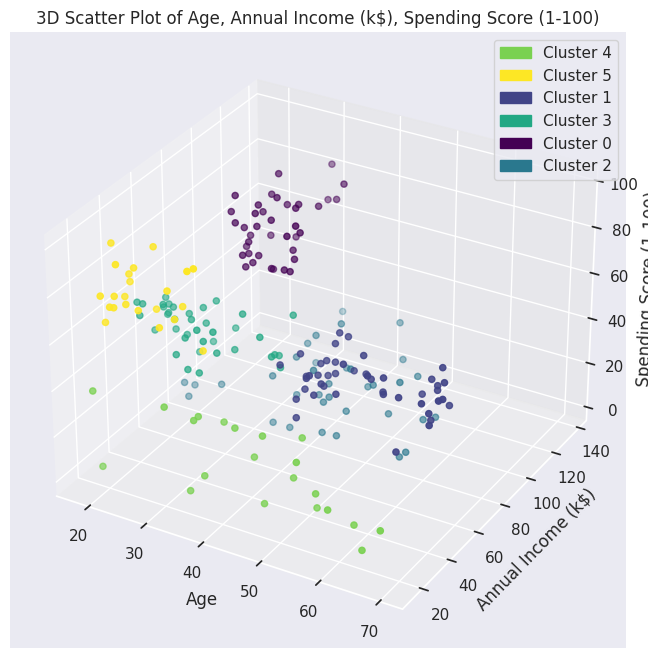

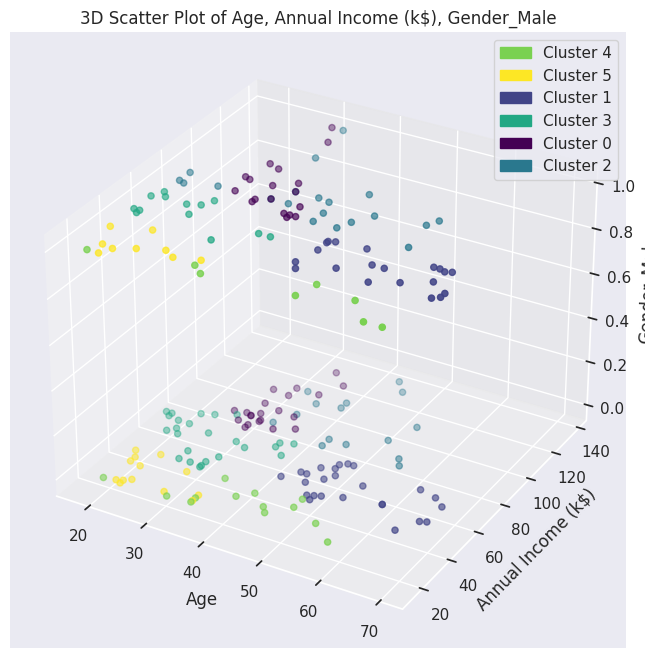

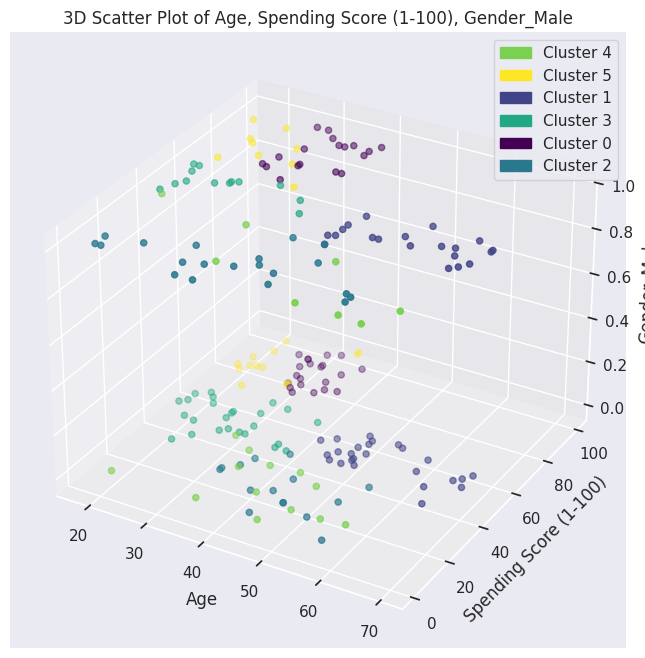

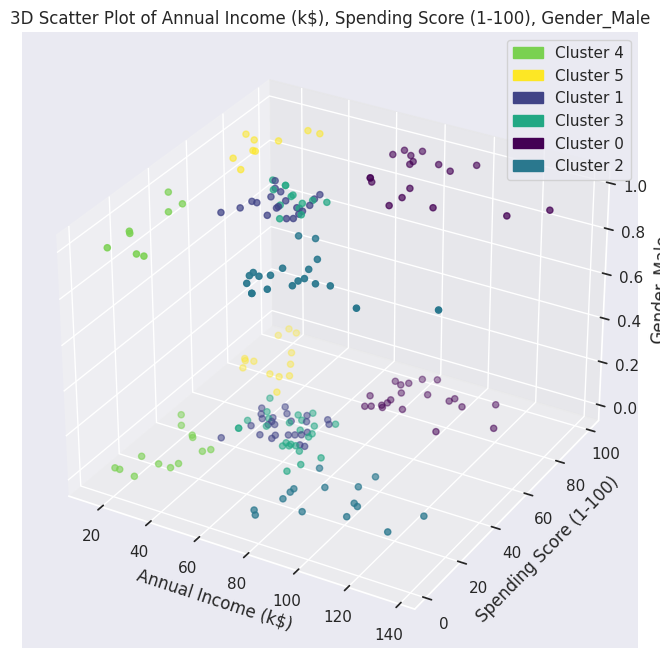

In [170]:
import matplotlib.patches as mpatches
import itertools
from mpl_toolkits.mplot3d import Axes3D

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']

column_combinations = list(itertools.combinations(columns, 3))

for combo in column_combinations:
    selected_columns = df[list(combo)]
    
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))  # Increase the plot size
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot with labels
    scatter = ax.scatter(selected_columns.iloc[:, 0], selected_columns.iloc[:, 1], selected_columns.iloc[:, 2],
                         c=df['Cluster_KMeans'], cmap='viridis')
    
    # Label axes
    ax.set_xlabel(combo[0])
    ax.set_ylabel(combo[1])
    ax.set_zlabel(combo[2])
    
    # Add Seaborn styling
    sns.set()
    
    clusters = df['Cluster_KMeans'].unique()
    legend_handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(cluster)), label=f'Cluster {cluster}') for cluster in clusters]
    ax.legend(handles=legend_handles)
    
    # Show the plot
    plt.title(f'3D Scatter Plot of {combo[0]}, {combo[1]}, {combo[2]}')
    plt.show()


The K-Means generated this 6 clusters:

- Cluster 0: This cluster consists of customers with a relatively higher average age (mean age of 162) and above-average annual income (mean income of 86.5). They tend to have a moderate spending score, and they are evenly distributed between genders.

- Cluster 1: Customers in this cluster are characterized by a lower average age (mean age of 81.2) and moderate annual income. They exhibit a relatively higher spending score, suggesting they are willing to spend more. This cluster is also fairly evenly distributed between genders.

- Cluster 2: Cluster 2 includes customers with an above-average annual income (mean income of 88.2) and a moderate age (mean age of 164.4). They tend to have a higher spending score, and there is a strong presence of males in this cluster.

- Cluster 3: Customers in this cluster have a relatively lower average age (mean age of 90) and a wide range of annual incomes. Their spending score is moderate, and there is an even gender distribution in this cluster.

- Cluster 4: Cluster 4 groups customers with a very wide range of ages and relatively lower annual income. Their spending score varies significantly but tends to be moderate. The gender distribution is fairly balanced.

- Cluster 5: This cluster is characterized by a moderate average age (mean age of 23.1) and a wide range of annual incomes. Customers in this cluster have a high spending score, indicating a willingness to spend more. There is a strong presence of males in this cluster.

## DBSCAN

DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a powerful unsupervised clustering algorithm designed to identify dense regions within data points, thus partitioning them into distinct clusters. Unlike traditional clustering algorithms, such as K-Means, DBSCAN does not require specifying the number of clusters beforehand, making it particularly well-suited for datasets with irregularly shaped clusters or varying cluster densities.

**DBSCAN Key Concepts:**

- **Core Point**: A data point is considered a core point if there are at least 'MinPts' data points within a specified radius ('ε') of it.

- **Border Point**: A data point is a border point if it is within 'ε' distance of a core point but does not have 'MinPts' data points within 'ε' of itself.

- **Noise Point**: Data points that do not fall into either of the above categories are considered noise points.

**DBSCAN Formulas:**

DBSCAN operates based on the concepts of core points, border points, and noise points. These can be mathematically defined as follows:

- **Core Point Condition:**

$$
\text{CorePoint}(p, \epsilon, \text{MinPts}) \Leftrightarrow |\{q \in D | dist(p, q) \leq \epsilon\}| \geq \text{MinPts}
$$

- **Border Point Condition:**

$$
\text{BorderPoint}(p, \epsilon, \text{MinPts}) \Leftrightarrow |\{q \in D | dist(p, q) \leq \epsilon\}| < \text{MinPts} \text{ and } \exists o \in D \text{ such that } dist(p, o) \leq \epsilon
$$

- **Noise Point:**

Data points that do not satisfy the core or border point conditions are considered noise points.

DBSCAN provides a robust approach to cluster data by discovering clusters of varying shapes and sizes, while effectively identifying and isolating outliers or noise points. Its ability to adapt to varying data densities and produce meaningful clusters makes it a valuable tool in data analysis and pattern recognition.

In [171]:
from sklearn.cluster import DBSCAN

The DBSCAN algorithm in scikit-learn, a popular Python machine learning library, comes with essential parameters that influence how it performs clustering. Here's a concise breakdown of the key parameters:

- eps (Epsilon): Determines the maximum distance for a point to be considered a neighbor.

- min_samples: Specifies the minimum number of neighbors for a point to be a core point.

It's challenging to determine the optimal values for the DBSCAN parameters arbitrarily. To find the most suitable parameter combination, I will begin by constructing a matrix of tested configurations.

In [172]:
eps_values = np.arange(6,12,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(itertools.product(eps_values, min_samples))

We use the Silhouette Method in conjunction with DBSCAN to systematically determine the optimal parameter combination of eps (maximum distance for point density) and min_samples (minimum number of points in a neighborhood). This method offers an objective, data-driven approach for assessing the quality of clusters produced by DBSCAN. By calculating the Silhouette Score for a range of parameter combinations, we can identify the combination that yields the highest score, signifying well-defined and separate clusters. This approach enhances the effectiveness and interpretability of DBSCAN clustering for our specific dataset, promoting the selection of parameters that result in meaningful cluster assignments. Additionally, it helps avoid the need for arbitrary parameter tuning and provides a visual confirmation of the clustering quality.

In [173]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_score = -1 
optimal_eps = None
optimal_min_samples = None

for eps, min_samples in DBSCAN_params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_model)
    
    unique_labels = set(labels)
    if len(unique_labels) < 2:
        continue 
    
    silhouette = silhouette_score(df_model, labels)
    
    if silhouette > best_score:
        best_score = silhouette
        optimal_eps = eps
        optimal_min_samples = min_samples

print("Optimal Combination (eps, min_samples):", optimal_eps, optimal_min_samples)
print("Highest Silhouette Score:", best_score)


Optimal Combination (eps, min_samples): 11.75 6
Highest Silhouette Score: 0.21671994360647223


In [174]:
dbscan = DBSCAN(eps = optimal_eps,min_samples= optimal_min_samples)
labels = dbscan.fit_predict(df_model)
df['Cluster_DBSCAN'] = labels
df['Cluster_DBSCAN'].unique()

array([-1,  0,  1,  2,  3])

When we applied DBSCAN to our dataset, it created a total of five clusters, with cluster labels assigned as 0, 1, 2, 3, and 4. One of these clusters, typically labeled as -1, represents outliers or noise. Therefore, we have four meaningful clusters (clusters 0, 1, 2, and 3) and one outlier cluster (cluster -1) in our DBSCAN clustering result.

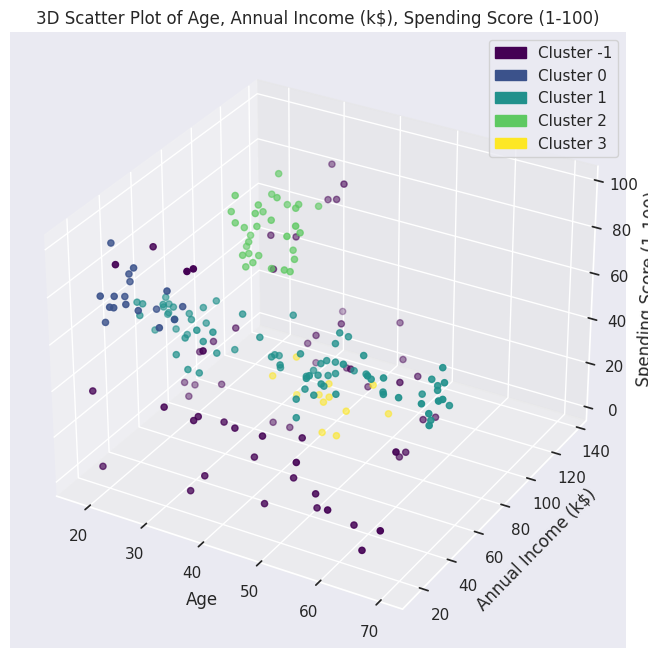

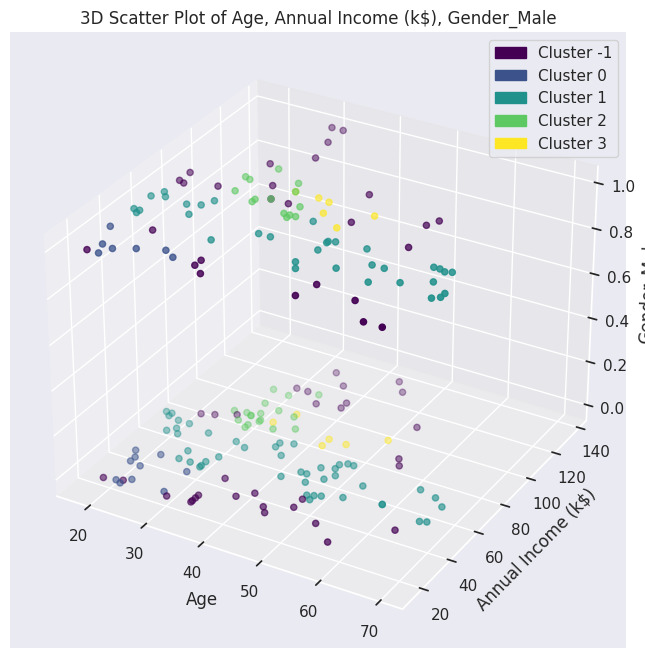

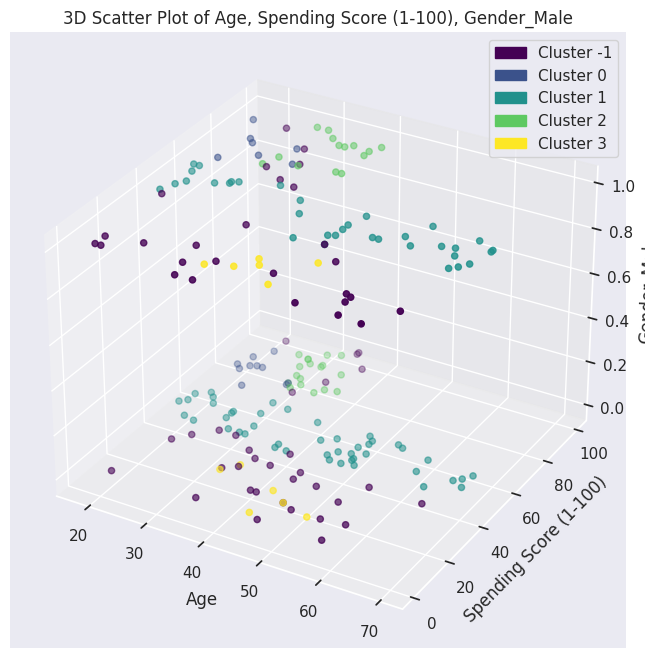

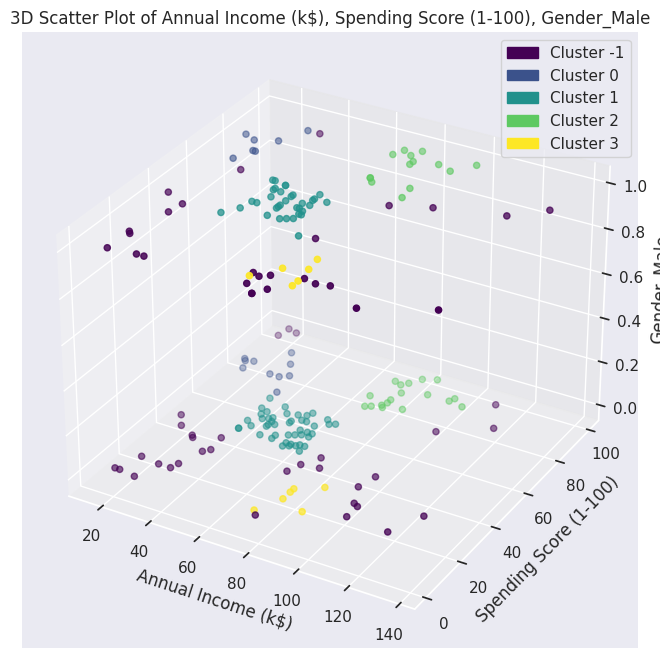

In [175]:
import matplotlib.patches as mpatches
import itertools
from mpl_toolkits.mplot3d import Axes3D

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']

column_combinations = list(itertools.combinations(columns, 3))

for combo in column_combinations:
    selected_columns = df[list(combo)]
    
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))  # Increase the plot size
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot with labels
    scatter = ax.scatter(selected_columns.iloc[:, 0], selected_columns.iloc[:, 1], selected_columns.iloc[:, 2],
                         c=df['Cluster_DBSCAN'], cmap='viridis')
    
    # Label axes
    ax.set_xlabel(combo[0])
    ax.set_ylabel(combo[1])
    ax.set_zlabel(combo[2])
    
    # Add Seaborn styling
    sns.set()
    
    clusters = df['Cluster_DBSCAN'].unique()
    legend_handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(cluster)), label=f'Cluster {cluster}') for cluster in clusters]
    ax.legend(handles=legend_handles)
    
    # Show the plot
    plt.title(f'3D Scatter Plot of {combo[0]}, {combo[1]}, {combo[2]}')
    plt.show()


The clusters are grouped in 4:

- Cluster -1 (Noise Cluster): This cluster consists of 59 data points that are characterized by a wide range of ages, with a higher average age compared to other clusters. These individuals exhibit varying annual incomes and spending scores, resulting in a broad distribution. Gender-wise, it has a relatively balanced distribution between males and females. Cluster -1 is indicative of customers who don't fit well into the distinct clusters and are considered as outliers or noise in the dataset.

- Cluster 0: Cluster 0 comprises 17 individuals with a relatively young age range and moderate annual incomes. Their spending scores are mostly concentrated in a narrower range, suggesting a consistent pattern of spending. The majority of customers in this cluster are females. This group represents younger customers with moderate spending habits.

- Cluster 1: This cluster contains 80 customers who have a diverse age range but generally fall within the middle-age category. They have moderate to high annual incomes and show a broad distribution of spending scores. Most customers in this cluster are males. Cluster 1 represents middle-aged customers with varying spending habits.

- Cluster 2: Cluster 2 consists of 32 individuals who are relatively older with high annual incomes. Their spending scores are spread over a wide range. The gender distribution is almost balanced. This cluster represents older, affluent customers with diverse spending behaviors.

- Cluster 3: Cluster 3 includes 12 individuals with a relatively narrow age range and very high annual incomes. Their spending scores are clustered around a high value, indicating consistent and high spending habits. The majority of customers in this cluster are females. Cluster 3 represents younger, affluent female customers with similar and high spending tendencies.

# Conclusion

In conclusion, this paper delved into the Customer Clustering Project, where we harnessed the power of DBSCAN and K-Means clustering algorithms to gain a deeper understanding of our customer base. The silhouette scores, indicative of clustering quality, underscored the distinction between these two approaches, with K-Means achieving a higher score of 0.45 compared to DBSCAN's 0.21. While DBSCAN excelled in identifying outliers and anomalies, K-Means showcased its prowess in forming well-defined and cohesive customer clusters.

These findings elucidate the versatility of these clustering models in dissecting customer data, offering a comprehensive view of the customer landscape. With the ability to identify anomalies and uncover homogeneous customer groups, we are now better equipped to refine our marketing strategies, enhance customer engagement, and drive business growth. The multi-faceted approach presented in this paper underscores the importance of data-driven decision-making in today's dynamic business environment, positioning us to adapt, innovate, and thrive.